In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import IPython
import imageio
import os

import os, sys, inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir) 

import algorithms as a
import force_functions as f

In [2]:
t_max = 500
dt = 5e-3
lam = 0.1931833275037836
N = 48
K = 1
rmax = 1
L = N * rmax / 3.

In [3]:
def init(N, L):
    r0 = np.random.uniform(-L/2., L/2., size=(N,3))
    
    p0 = np.zeros([N, 3])
    p0[0] = np.array([1/2., 1/2., 1/2.])
    p0[-1] = -p0[0]
    
    return r0, p0

In [32]:
def calc_energy(r, p, K=1, rmax=1):
    
    T = .5 * np.linalg.norm(p)**2
    
    V = (.5 * K * rmax * np.log(1 - np.linalg.norm(r[1:]-r[:-1], axis=1)**2 / rmax**2)).sum()
        
    return T + V

In [133]:
r0, p0 = init(N=N, L=.2)

In [134]:
R, P, t = a.velocity_verlet_Ndim(r0.copy(), p0.copy(), t_max, dt, f.FENE_force)

100%|██████████| 99999/99999 [02:01<00:00, 822.28it/s]


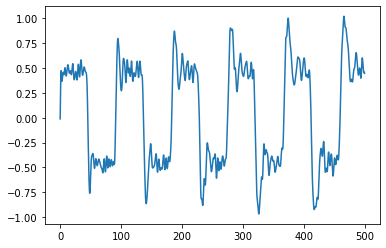

In [135]:
plt.plot(t, R[:,0,0])

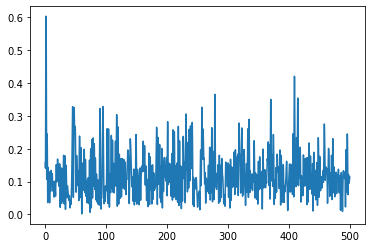

In [136]:
plt.plot(t, np.linalg.norm(R[:,1,:]-R[:,0,:], axis=1))

In [137]:
np.linalg.norm(R[:,1,:]-R[:,0,:], axis=1).mean()

0.12805816546282672

In [138]:
E = np.zeros(len(t))
for i in tqdm(range(len(t))):
    E[i] = calc_energy(R[i], R[i])

100%|██████████| 100000/100000 [00:01<00:00, 50515.28it/s]


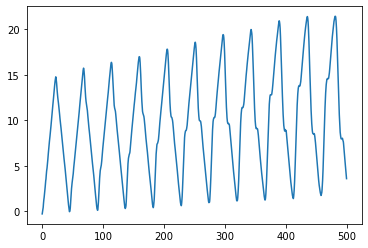

In [139]:
plt.plot(t, E)

In [140]:
def radius_of_gyration(r):
    
    r_cm = r.mean(axis=0)
    
    Rg2 = (np.linalg.norm(r - r_cm, axis=1)**2).mean()
    
    return Rg2

In [141]:
def end2end_distance(r):
    return np.linalg.norm(r[-1] - r[0])**2

In [142]:
Rg2 = np.zeros(len(t))
for i in tqdm(range(len(t))):
    Rg2[i] = radius_of_gyration(R[i])

100%|██████████| 100000/100000 [00:02<00:00, 48250.05it/s]


In [143]:
np.sqrt(Rg2.mean())

0.6523521800890038

In [144]:
Re2 = np.zeros(len(t))
for i in tqdm(range(len(t))):
    Re2[i] = end2end_distance(R[i])

100%|██████████| 100000/100000 [00:00<00:00, 189379.10it/s]


In [145]:
np.sqrt(Re2.mean())

1.8132423126610682

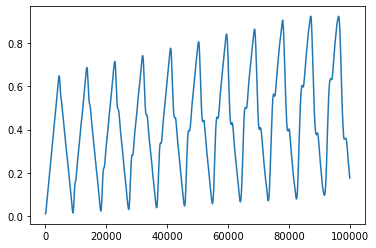

In [146]:
plt.plot(Rg2)

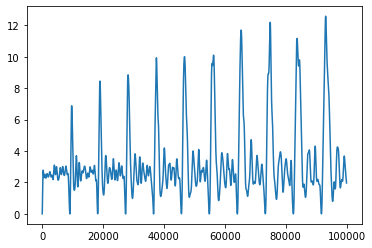

In [147]:
plt.plot(Re2)

In [ ]:
T = 0.1*rmax**2
kb = 1.380649e-23
cv = ((E-E[0])**2).mean() / (N * T**2)
print(cv)

In [5]:
r0, p0 = init(N=N, L=L)

In [6]:
R2, P2, t2 = a.velocity_verlet_Ndim(r0.copy(), p0.copy(), t_max, dt, f.FENE_force,
                                    periodic={'PBC': True, 'box_size': L, 'closed': True})

100%|██████████| 99999/99999 [04:02<00:00, 412.88it/s]


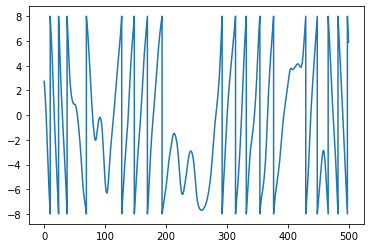

In [91]:
plt.plot(t2, R2[:,-1,0])

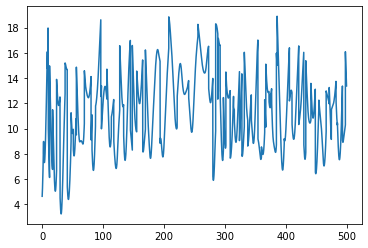

In [85]:
plt.plot(t2, np.linalg.norm(R2[:,0,:]-R2[:,-1,:], axis=1))

In [9]:
r_single = R2[:,10,:]
dr2 = np.linalg.norm(r_single[:] - r_single[0], axis=1)**2

In [11]:
gamma = .2

In [12]:
R2_LM, P2_LM, t2_LM = a.leimkuhler_matthews_BAOAB(r0.copy(), p0.copy(), t_max, dt, f.FENE_force, gamma,
                                                  periodic={'PBC': True, 'box_size': L, 'closed': True})

100%|██████████| 99999/99999 [04:05<00:00, 407.66it/s]


In [13]:
r_single_LM = R2_LM[:,10,:]
dr2_LM = np.linalg.norm(r_single_LM[:] - r_single_LM[0], axis=1)**2

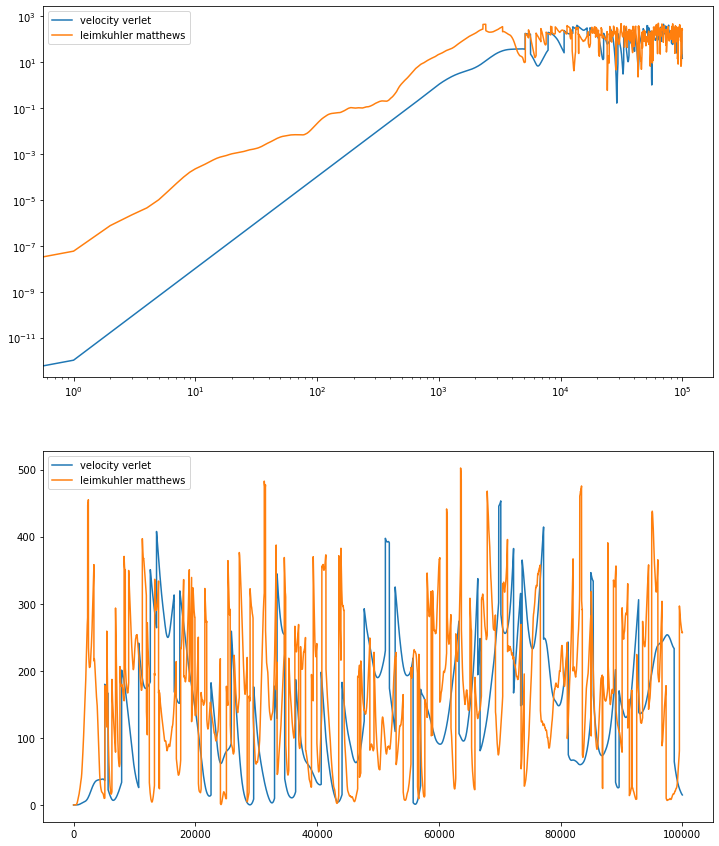

In [18]:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12, 15))
ax[0].plot(dr2, label='velocity verlet')
ax[0].plot(dr2_lg, label='leimkuhler matthews')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].legend()

ax[1].plot(dr2, label='velocity verlet')
ax[1].plot(dr2_lg, label='leimkuhler matthews')
ax[1].legend()
plt.show()